# Retirement Planning with Constructed Portfolio

In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime as datetime

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
load_dotenv()

True

## Part 1: Create a Portfolio for Client Investment

#### Set total number of Shares for Each Holding

In [3]:
# Current amount of shares held in all holdings of portfolio
vgsh_shares = 100
slqd_shares = 100
igsb_shares = 100
agg_shares = 100
hdv_shares = 100
spy_shares = 100
ko_shares = 100
wmt_shares = 100
t_shares = 100
msft_shares = 100

In [4]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [5]:
# Set the tickers for both the bond and stock portion of the portfolio and set timeframe to 1 day
tickers = ["VGSH","SLQD","IGSB","AGG","HDV","SPY","KO","WMT","T","MSFT"]

timeframe = "1Day"

# Format current date as ISO format
start_date = pd.Timestamp("2023-03-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-03-01", tz="America/New_York").isoformat()

In [6]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start= start_date,
    end= end_date
).df

# Separate ticker data
VGSH = prices_df[prices_df['symbol']=='VGSH'].drop('symbol', axis=1)
SLQD = prices_df[prices_df['symbol']=='SLQD'].drop('symbol', axis=1)
IGSB = prices_df[prices_df['symbol']=='IGSB'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)
HDV = prices_df[prices_df['symbol']=='HDV'].drop('symbol', axis=1)
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
KO = prices_df[prices_df['symbol']=='KO'].drop('symbol', axis=1)
WMT = prices_df[prices_df['symbol']=='WMT'].drop('symbol', axis=1)
T = prices_df[prices_df['symbol']=='T'].drop('symbol', axis=1)
MSFT = prices_df[prices_df['symbol']=='MSFT'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([VGSH, SLQD, IGSB, AGG, HDV, SPY, KO, WMT, T, MSFT], axis=1, keys=["VGSH","SLQD","IGSB","AGG","HDV","SPY","KO","WMT","T","MSFT"])
prices_df.head()

VGSH                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2023-03-01 05:00:00+00:00  57.52  57.53  57.45  57.47  3318790        7534   

                                       SLQD                ...         T  \
                                vwap   open   high    low  ...    volume   
timestamp                                                  ...             
2023-03-01 05:00:00+00:00  57.479828  47.76  47.76  47.65  ...  23342644   

                                                    MSFT                  \
                          trade_count       vwap    open    high     low   
timestamp                                                                  
2023-03-01 05:00:00+00:00       86270  18.673476  250.76  250.93  245.79   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2023-03-01 05:00:00+00:00  246.27  27634988      331994  247.437437  

[1 rows x 70 columns]

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [7]:
vgsh_close_price = float(prices_df["VGSH"]["close"])
slqd_close_price = float(prices_df["SLQD"]["close"])
igsb_close_price = float(prices_df["IGSB"]["close"])
agg_close_price = float(prices_df["AGG"]["close"])
hdv_close_price = float(prices_df["HDV"]["close"])
spy_close_price = float(prices_df["SPY"]["close"])
ko_close_price = float(prices_df["KO"]["close"])
wmt_close_price = float(prices_df["WMT"]["close"])
t_close_price = float(prices_df["T"]["close"])
msft_close_price = float(prices_df["MSFT"]["close"])

# Print closing prices for all holdings of portfolio
print(f"Vanguard Short-Term Treasury Index Fund close price is: ${vgsh_close_price:.2f}")
print(f'iShares 0-5 Year Investment Grade Corporate Bond ETF close price is: ${slqd_close_price:.2f}')
print(f'iShares 1-5 Year Investment Grade Corporate Bond ETF close price is: ${igsb_close_price:.2f}')
print(f'iShares Core US Aggregate Bond ETF close price is: ${agg_close_price:.2f}')
print(f'HDV close price is: ${hdv_close_price:.2f}')
print(f'SPY close price is: ${spy_close_price:.2f}')
print(f'Coca Cola close price is: ${ko_close_price:.2f}')
print(f'Walmart close price is: ${wmt_close_price:.2f}')
print(f'AT&T close price is: ${t_close_price:.2f}')
print(f'Microsoft close price is: ${msft_close_price:.2f}')

Vanguard Short-Term Treasury Index Fund close price is: $57.47
iShares 0-5 Year Investment Grade Corporate Bond ETF close price is: $47.67
iShares 1-5 Year Investment Grade Corporate Bond ETF close price is: $49.66
iShares Core US Aggregate Bond ETF close price is: $96.52
HDV close price is: $100.60
SPY close price is: $394.74
Coca Cola close price is: $58.86
Walmart close price is: $140.15
AT&T close price is: $18.66
Microsoft close price is: $246.27


#### Calculate the value, in US dollars, of the current amount of shares in each of the fixed income and equity portion of the portfolio and print the results.

In [8]:
vgsh_value = vgsh_close_price * vgsh_shares
slqd_value = slqd_close_price * slqd_shares
igsb_value = igsb_close_price * igsb_shares
agg_value = agg_close_price * agg_shares
hdv_value = hdv_close_price * hdv_shares
total_fixed_income = vgsh_value + slqd_value + igsb_value + agg_value + hdv_value


print(f"The current value of the fixed income portion of the portfolio is ${total_fixed_income:.2f}")

The current value of the fixed income portion of the portfolio is $35192.00


In [9]:
spy_value = spy_close_price * spy_shares
ko_value = ko_close_price * ko_shares
wmt_value = wmt_close_price * wmt_shares
t_value = t_close_price * t_shares
msft_value = msft_close_price * msft_shares
total_equity = + spy_value + ko_value + wmt_value + t_value + msft_value 

print(f"The current value of the equities portion of the portfolio is ${total_equity:.2f}")

The current value of the equities portion of the portfolio is $85868.00


In [10]:
# Calculate the total value of the portfolio
total_portfolio_value = total_fixed_income + total_equity

print(f"The current balance of the overall portfolio is ${total_portfolio_value:.2f}")

The current balance of the overall portfolio is $121060.00


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [11]:
# Consolidate financial assets data into a Python list
savings_data = ["Total Fixed Income", "Total Stocks/Eqities"]

savings_data

['Total Fixed Income', 'Total Stocks/Eqities']

In [12]:
savings_df = pd.DataFrame(
    {"Amount": [total_fixed_income, total_equity]},
    index=savings_data
)

savings_df

,Amount
Total Fixed Income,35192.0
Total Stocks/Eqities,85868.0


#### Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the client's portfolio. The y-axis of the pie chart uses `amount`.

<AxesSubplot: title={'center': 'Portfolio Composition - Fixed Income vs Equtity'}, ylabel='Amount'>

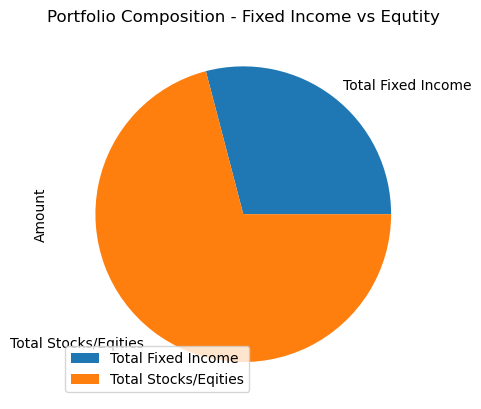

In [13]:
savings_df.plot.pie(
    y="Amount",
    title="Portfolio Composition - Fixed Income vs Equtity")

## Part 2: Create a Plan for Implementaion of Investing in Portfolio

#### Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a equal weighted portfolio split: 50% stocks (SPY, KO, WMT, T, MSFT) and 50% Fixed Income (VGSH, SLQD, IGSB, AGG, HDV).

In [14]:
today = str(datetime.datetime.now()).split()[0]
three_year_back = str(datetime.datetime.now() - datetime.timedelta(days=3*365)).split()[0]

start_date_three_year_back = pd.Timestamp(three_year_back, tz= "America/New_York").isoformat()
end_date = pd.Timestamp(today, tz= "America/New_York").isoformat()
start_date_three_year_back, end_date

('2020-03-07T00:00:00-05:00', '2023-03-07T00:00:00-05:00')

In [15]:
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start= start_date_three_year_back,
    end= end_date).df


VGSH = prices_df[prices_df['symbol']=='VGSH'].drop('symbol', axis=1)
SLQD = prices_df[prices_df['symbol']=='SLQD'].drop('symbol', axis=1)
IGSB = prices_df[prices_df['symbol']=='IGSB'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)
HDV = prices_df[prices_df['symbol']=='HDV'].drop('symbol', axis=1)
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
KO = prices_df[prices_df['symbol']=='KO'].drop('symbol', axis=1)
WMT = prices_df[prices_df['symbol']=='WMT'].drop('symbol', axis=1)
T = prices_df[prices_df['symbol']=='T'].drop('symbol', axis=1)
MSFT = prices_df[prices_df['symbol']=='MSFT'].drop('symbol', axis=1)

prices_df = pd.concat([VGSH, SLQD, IGSB, AGG, HDV, SPY, KO, WMT, T, MSFT], axis=1, keys=["VGSH","SLQD","IGSB","AGG","HDV","SPY","KO","WMT","T","MSFT"])
prices_df.head()


VGSH                                    \
                            open     high      low  close   volume   
timestamp                                                            
2020-03-09 04:00:00+00:00  62.18  62.3700  60.0500  62.19  6404006   
2020-03-10 04:00:00+00:00  61.99  62.1000  61.9000  61.92  3518046   
2020-03-11 04:00:00+00:00  62.04  62.0425  61.8000  61.89  3954178   
2020-03-12 04:00:00+00:00  61.96  62.1400  61.8562  62.06  4711323   
2020-03-13 04:00:00+00:00  61.94  62.0400  61.9000  61.96  2858232   

                                                   SLQD                    \
                          trade_count       vwap   open     high      low   
timestamp                                                                   
2020-03-09 04:00:00+00:00        8577  62.072523  51.67  51.8400  51.2500   
2020-03-10 04:00:00+00:00        4623  61.969571  51.25  51.3000  51.0200   
2020-03-11 04:00:00+00:00        4392  61.944781  50.95  51.0013  50.5500   
2020-03-12 04:00:00+00:00        8442  61.989048  50.15  50.4039  48.0100   
2020-03-13 04:00:00+00:00        5827  61.956526  49.70  49.9250  49.0901   

                           ...         T                           MSFT  \
                           ...    volume trade_count       vwap    open   
timestamp                  ...                                            
2020-03-09 04:00:00+00:00  ...  67968773      347813  35.223009  151.00   
2020-03-10 04:00:00+00:00  ...  56660905      278868  35.149327  158.16   
2020-03-11 04:00:00+00:00  ...  45340446      214633  34.567710  157.13   
2020-03-12 04:00:00+00:00  ...  84224194      420445  32.050640  145.30   
2020-03-13 04:00:00+00:00  ...  64688756      308932  32.897785  147.50   

                                                                           \
                             high     low     close    volume trade_count   
timestamp                                                                   
2020-03-09 04:00:00+00:00  157.75  150.00  150.5800  70419319      635298   
2020-03-10 04:00:00+00:00  161.03  152.58  160.9200  65354439      549196   
2020-03-11 04:00:00+00:00  157.70  151.15  153.6300  56504314      502056   
2020-03-12 04:00:00+00:00  153.47  138.58  139.0600  93227912      822941   
2020-03-13 04:00:00+00:00  161.91  140.73  158.8438  92758447      824552   

                                       
                                 vwap  
timestamp                              
2020-03-09 04:00:00+00:00  153.600794  
2020-03-10 04:00:00+00:00  157.297725  
2020-03-11 04:00:00+00:00  154.321575  
2020-03-12 04:00:00+00:00  143.661545  
2020-03-13 04:00:00+00:00  148.493061  

[5 rows x 70 columns]

#### Run a Monte Carlo simulation of 500 samples and 10 years for the equal weight portfolio

In [16]:
monte_carlo_simulation = MCSimulation(
    portfolio_data= prices_df,
    weights=[0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10],
    num_simulation= 500,
    num_trading_days= 252 * 10)

monte_carlo_simulation.portfolio_data.head()

VGSH                                    \
                            open     high      low  close   volume   
timestamp                                                            
2020-03-09 04:00:00+00:00  62.18  62.3700  60.0500  62.19  6404006   
2020-03-10 04:00:00+00:00  61.99  62.1000  61.9000  61.92  3518046   
2020-03-11 04:00:00+00:00  62.04  62.0425  61.8000  61.89  3954178   
2020-03-12 04:00:00+00:00  61.96  62.1400  61.8562  62.06  4711323   
2020-03-13 04:00:00+00:00  61.94  62.0400  61.9000  61.96  2858232   

                                                                SLQD           \
                          trade_count       vwap daily_return   open     high   
timestamp                                                                       
2020-03-09 04:00:00+00:00        8577  62.072523          NaN  51.67  51.8400   
2020-03-10 04:00:00+00:00        4623  61.969571    -0.004342  51.25  51.3000   
2020-03-11 04:00:00+00:00        4392  61.944781    -0.000484  50.95  51.0013   
2020-03-12 04:00:00+00:00        8442  61.989048     0.002747  50.15  50.4039   
2020-03-13 04:00:00+00:00        5827  61.956526    -0.001611  49.70  49.9250   

                           ...          T                 MSFT          \
                           ...       vwap daily_return    open    high   
timestamp                  ...                                           
2020-03-09 04:00:00+00:00  ...  35.223009          NaN  151.00  157.75   
2020-03-10 04:00:00+00:00  ...  35.149327     0.033439  158.16  161.03   
2020-03-11 04:00:00+00:00  ...  34.567710    -0.037099  157.13  157.70   
2020-03-12 04:00:00+00:00  ...  32.050640    -0.074739  145.30  153.47   
2020-03-13 04:00:00+00:00  ...  32.897785     0.079211  147.50  161.91   

                                                                               \
                              low     close    volume trade_count        vwap   
timestamp                                                                       
2020-03-09 04:00:00+00:00  150.00  150.5800  70419319      635298  153.600794   
2020-03-10 04:00:00+00:00  152.58  160.9200  65354439      549196  157.297725   
2020-03-11 04:00:00+00:00  151.15  153.6300  56504314      502056  154.321575   
2020-03-12 04:00:00+00:00  138.58  139.0600  93227912      822941  143.661545   
2020-03-13 04:00:00+00:00  140.73  158.8438  92758447      824552  148.493061   

                                        
                          daily_return  
timestamp                               
2020-03-09 04:00:00+00:00          NaN  
2020-03-10 04:00:00+00:00     0.068668  
2020-03-11 04:00:00+00:00    -0.045302  
2020-03-12 04:00:00+00:00    -0.094838  
2020-03-13 04:00:00+00:00     0.142268  

[5 rows x 80 columns]

In [17]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
monte_carlo_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 110.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 120.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 130.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 140.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 150.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 160.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 170.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 180.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 190.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 200.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 210.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 220.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 230.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 240.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 250.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 260.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 270.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 280.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 290.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 300.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 310.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 320.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 330.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 340.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 350.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 360.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 370.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 380.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 390.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 400.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 410.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 420.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 430.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 440.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 450.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 460.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 470.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 480.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 490.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997635,1.006135,0.993441,1.003504,0.996224,1.002260,0.994579,0.999825,1.006155,0.998381,...,1.003986,1.002039,0.997804,1.004457,0.992199,1.008383,0.992810,1.001093,1.002524,0.998552
2,0.992885,1.006498,0.995082,0.996522,0.998239,0.998567,0.994725,1.002471,1.003589,1.002397,...,0.994131,1.003202,0.994417,1.002148,0.990524,1.002301,0.994057,1.003365,1.008225,0.995286
3,0.989545,0.999139,0.996859,0.984494,1.001362,0.995695,0.993007,1.006403,1.008273,0.997863,...,0.996027,1.000285,0.991604,1.003146,0.990345,0.999734,0.999319,1.003317,1.006920,1.004741
4,0.995022,0.999062,0.996746,0.982625,0.998219,0.994935,0.993033,1.010601,1.013954,0.999399,...,0.999504,0.995403,0.995202,0.996023,0.989482,0.997408,1.002121,1.001009,1.003279,1.008342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.979264,1.475060,1.396292,1.348959,1.220969,1.486160,1.753841,1.322641,1.724173,1.176334,...,1.551753,1.295756,1.369245,1.065974,0.994085,1.555302,1.071445,1.865813,1.650717,1.647956
2517,0.978772,1.472709,1.392564,1.343248,1.220475,1.494193,1.747312,1.317853,1.709511,1.172641,...,1.542086,1.292266,1.372023,1.066455,0.989666,1.556280,1.074393,1.858892,1.659834,1.660705
2518,0.982862,1.473967,1.385713,1.340915,1.226609,1.498251,1.748228,1.312753,1.717630,1.170749,...,1.555510,1.299789,1.365883,1.066438,0.984211,1.551060,1.078947,1.861567,1.674218,1.656680
2519,0.985399,1.474802,1.391802,1.343358,1.215759,1.493551,1.755322,1.317742,1.712098,1.176276,...,1.560068,1.290646,1.374075,1.064791,0.981514,1.546908,1.087203,1.850601,1.675468,1.662394


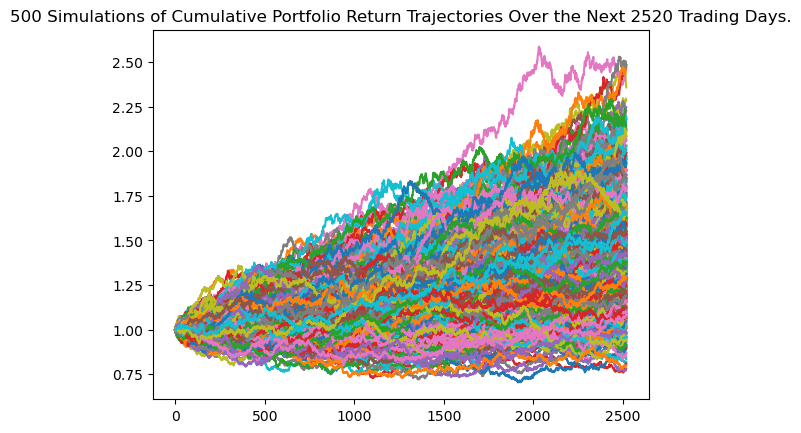

In [18]:
# Visualize the 10-year Monte Carlo simulation by creating an overlay line plot
mc_line_plot = monte_carlo_simulation.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

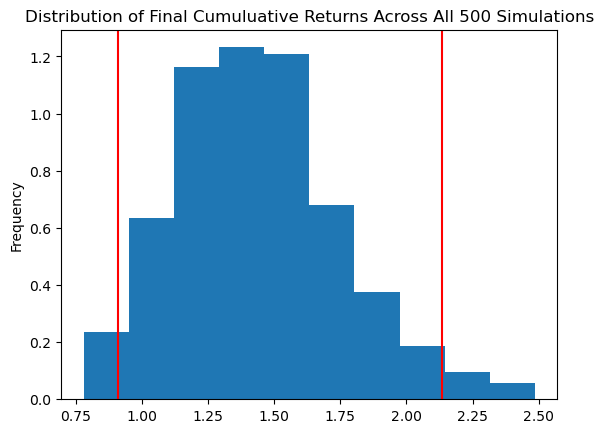

In [19]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation by plotting a histogram
mc_distribution_plot = monte_carlo_simulation.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [20]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
monte_carlo_stats =monte_carlo_simulation.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
print(monte_carlo_stats)

count           500.000000
mean              1.440444
std               0.313713
min               0.781343
25%               1.219989
50%               1.409463
75%               1.625561
max               2.485636
95% CI Lower      0.911016
95% CI Upper      2.134807
Name: 2520, dtype: float64


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Analyze the Retirement Portfolio Forecasts

In [21]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the stock and bond portion of the members portfolio is ${total_portfolio_value: .2f}")

The current balance of the stock and bond portion of the members portfolio is $ 121060.00


In [22]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = monte_carlo_stats[8] * total_portfolio_value
ci_upper_thirty_cumulative_return = monte_carlo_stats[9] * total_portfolio_value

# Print the result of your calculations
print(f" The lower `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio is ${ci_lower_thirty_cumulative_return :,.2f}")
print(f" The upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio is ${ci_upper_thirty_cumulative_return :,.2f}")

print(f"There is a 95% chance that investing the Stock/Bond portion of the portfolio (current value ${total_portfolio_value:,.2f}) in"
      f" an equal weight distribution over the next 10 years will result in a value within the range of"
      f" ${ci_lower_thirty_cumulative_return:,.2f} and ${ci_upper_thirty_cumulative_return:,.2f}.")

 The lower `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio is $110,287.62
 The upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio is $258,439.72
There is a 95% chance that investing the Stock/Bond portion of the portfolio (current value $121,060.00) in an equal weight distribution over the next 10 years will result in a value within the range of $110,287.62 and $258,439.72.


### Forecast Cumulative Returns in Aggressive Model Portfolio
The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now using the 90/10 Aggressive Portfolio. Because of the overweight in equity/risk in the portfolio, returns and outcomes could be more volatile but also give way for the client to make better returns. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 10% bonds and 90% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

In [23]:
mc_1090_weight = MCSimulation(
    portfolio_data = prices_df,
    weights = [.02,.02,.02,.02,.02,.18,.18,.18,.18,.18],
    num_simulation = 500,
    num_trading_days = 252*10
)
# Review the simulation input data
mc_1090_weight.portfolio_data.head()

VGSH                                    \
                            open     high      low  close   volume   
timestamp                                                            
2020-03-09 04:00:00+00:00  62.18  62.3700  60.0500  62.19  6404006   
2020-03-10 04:00:00+00:00  61.99  62.1000  61.9000  61.92  3518046   
2020-03-11 04:00:00+00:00  62.04  62.0425  61.8000  61.89  3954178   
2020-03-12 04:00:00+00:00  61.96  62.1400  61.8562  62.06  4711323   
2020-03-13 04:00:00+00:00  61.94  62.0400  61.9000  61.96  2858232   

                                                                SLQD           \
                          trade_count       vwap daily_return   open     high   
timestamp                                                                       
2020-03-09 04:00:00+00:00        8577  62.072523          NaN  51.67  51.8400   
2020-03-10 04:00:00+00:00        4623  61.969571    -0.004342  51.25  51.3000   
2020-03-11 04:00:00+00:00        4392  61.944781    -0.000484  50.95  51.0013   
2020-03-12 04:00:00+00:00        8442  61.989048     0.002747  50.15  50.4039   
2020-03-13 04:00:00+00:00        5827  61.956526    -0.001611  49.70  49.9250   

                           ...          T                 MSFT          \
                           ...       vwap daily_return    open    high   
timestamp                  ...                                           
2020-03-09 04:00:00+00:00  ...  35.223009          NaN  151.00  157.75   
2020-03-10 04:00:00+00:00  ...  35.149327     0.033439  158.16  161.03   
2020-03-11 04:00:00+00:00  ...  34.567710    -0.037099  157.13  157.70   
2020-03-12 04:00:00+00:00  ...  32.050640    -0.074739  145.30  153.47   
2020-03-13 04:00:00+00:00  ...  32.897785     0.079211  147.50  161.91   

                                                                               \
                              low     close    volume trade_count        vwap   
timestamp                                                                       
2020-03-09 04:00:00+00:00  150.00  150.5800  70419319      635298  153.600794   
2020-03-10 04:00:00+00:00  152.58  160.9200  65354439      549196  157.297725   
2020-03-11 04:00:00+00:00  151.15  153.6300  56504314      502056  154.321575   
2020-03-12 04:00:00+00:00  138.58  139.0600  93227912      822941  143.661545   
2020-03-13 04:00:00+00:00  140.73  158.8438  92758447      824552  148.493061   

                                        
                          daily_return  
timestamp                               
2020-03-09 04:00:00+00:00          NaN  
2020-03-10 04:00:00+00:00     0.068668  
2020-03-11 04:00:00+00:00    -0.045302  
2020-03-12 04:00:00+00:00    -0.094838  
2020-03-13 04:00:00+00:00     0.142268  

[5 rows x 80 columns]

In [24]:
# Run the Monte Carlo simulation to forecast 10 years of the 90/10 portfolio cumulative returns
mc_1090_weight.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 110.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 120.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 130.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 140.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 150.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 160.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 170.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 180.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 190.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 200.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 210.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 220.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 230.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 240.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 250.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 260.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 270.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 280.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 290.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 300.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 310.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 320.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 330.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 340.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 350.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 360.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 370.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 380.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 390.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 400.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 410.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 420.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 430.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 440.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 450.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 460.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 470.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 480.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

Running Monte Carlo simulation number 490.


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastT

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005885,1.014153,0.994753,0.994507,1.002433,0.991875,0.997957,1.007987,0.996651,1.003220,...,0.992581,0.997727,0.999368,0.991265,0.999299,0.992549,0.992699,0.988011,1.003597,1.020442
2,0.998966,1.008636,1.004526,0.996842,0.996786,0.997113,1.005850,1.011913,0.992568,1.005524,...,0.998731,1.004574,1.014750,0.989258,0.991362,0.988549,1.002727,0.982042,1.000103,1.011154
3,1.012825,1.013176,1.006784,0.988548,0.996263,0.999114,1.001105,1.017749,0.985438,0.992303,...,0.988211,1.010412,1.005319,0.990839,1.002723,0.993067,0.997127,0.982165,0.991197,1.004307
4,1.020661,1.011483,0.999990,0.986441,0.996058,0.999997,1.002821,1.014986,0.976703,0.998220,...,0.987960,0.996711,1.005366,0.989499,1.011270,0.999016,1.009542,0.981521,0.993645,1.008790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.238386,1.468729,1.320459,2.180029,2.734798,3.730018,1.920704,1.689124,1.241276,3.698947,...,1.455451,1.897905,2.395143,3.134076,1.729679,1.985721,3.364774,1.301344,1.664873,2.519663
2517,1.246338,1.476672,1.341200,2.170218,2.745525,3.692007,1.905758,1.676304,1.234039,3.696565,...,1.466664,1.893038,2.409685,3.122343,1.724812,2.024670,3.328832,1.311017,1.656073,2.526495
2518,1.244048,1.475203,1.333106,2.171695,2.740146,3.669077,1.905751,1.695673,1.230866,3.680379,...,1.457558,1.900387,2.380302,3.155668,1.695711,2.017248,3.363888,1.301356,1.667860,2.499153
2519,1.255053,1.468632,1.320607,2.188981,2.725840,3.694758,1.899085,1.706154,1.220026,3.658715,...,1.466218,1.878444,2.394477,3.174146,1.682571,2.022634,3.368014,1.289808,1.668714,2.507225


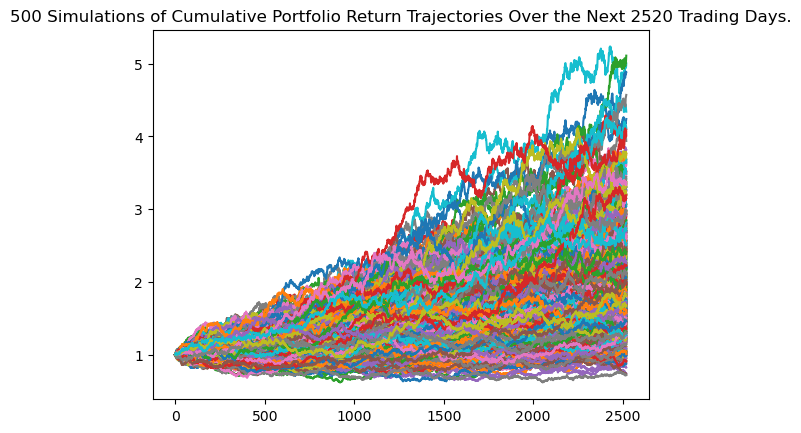

In [25]:
# Visualize the 10-year Monte Carlo simulation by creating an overlay line plot
mc_1090_line_plot = mc_1090_weight.plot_simulation()

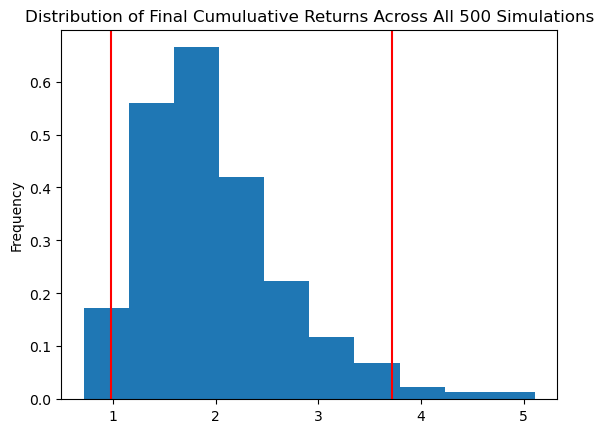

In [26]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation by plotting a histogram
mc_1090_distribution_plot = mc_1090_weight.plot_distribution()

In [27]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
mc_1090_stats = mc_1090_weight.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
print(mc_1090_stats)

count           500.000000
mean              1.981177
std               0.713119
min               0.718023
25%               1.497871
50%               1.864508
75%               2.338302
max               5.110412
95% CI Lower      0.981935
95% CI Upper      3.718204
Name: 2520, dtype: float64


C:\Users\jduke\OneDrive\Desktop\FinTech_Bootcamp_Projects\project_3\project_3_code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [28]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the members portfolio is ${total_portfolio_value}")

The current balance of the members portfolio is $121060.0


In [29]:
ci_lower_ten_cumulative_return = mc_1090_stats[8] * total_portfolio_value
ci_upper_ten_cumulative_return = mc_1090_stats[9] * total_portfolio_value

print(f" The lower `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio is ${ci_lower_ten_cumulative_return :.2f}")
print(f" The upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio is ${ci_upper_ten_cumulative_return :.2f}")

print(f"There is a 95% chance that investing the portfolio (current value ${total_portfolio_value:,.2f}) in a more aggressive 90/10 weight distribution over the next 10 years will result within the range of ${ci_lower_ten_cumulative_return:,.2f} and ${ci_upper_ten_cumulative_return:,.2f}.")

 The lower `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio is $118873.11
 The upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio is $450125.84
There is a 95% chance that investing the portfolio (current value $121,060.00) in a more aggressive 90/10 weight distribution over the next 10 years will result within the range of $118,873.11 and $450,125.84.
